In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Step 1: Load and Explore the Dataset
# Load the dataset
data = pd.read_csv("sales_data.csv")
print(data)

     Product Region  Sales  Profit  Discount     Category        Date
0  Product A   East    200      50      0.10  Electronics  01-01-2023
1  Product B   West    300      70      0.15    Furniture  02-01-2023
2  Product C  North    250      60      0.05  Electronics  03-01-2023
3  Product D  South    400      80      0.20    Furniture  04-01-2023
4  Product E   East    100      20      0.10   Stationery  05-01-2023
5  Product F   West    150      30      0.05   Stationery  06-01-2023
6  Product G  North    350      90      0.20  Electronics  07-01-2023
7  Product H  South    220      40      0.10    Furniture  08-01-2023
8  Product I   East    180      45      0.15  Electronics  09-01-2023
9  Product J   West    270      65      0.20   Stationery  10-01-2023


In [6]:
# Inspect the dataset
print("Dataset Shape:", data.shape)
print("Dataset Info:")
data.info()
print("Missing Values:")
print(data.isnull().sum())

Dataset Shape: (10, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   10 non-null     object 
 1   Region    10 non-null     object 
 2   Sales     10 non-null     int64  
 3   Profit    10 non-null     int64  
 4   Discount  10 non-null     float64
 5   Category  10 non-null     object 
 6   Date      10 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 688.0+ bytes
Missing Values:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [8]:
# Step 2: Data Cleaning
# Remove duplicates
data = data.drop_duplicates()
print(data)

     Product Region  Sales  Profit  Discount     Category        Date
0  Product A   East    200      50      0.10  Electronics  01-01-2023
1  Product B   West    300      70      0.15    Furniture  02-01-2023
2  Product C  North    250      60      0.05  Electronics  03-01-2023
3  Product D  South    400      80      0.20    Furniture  04-01-2023
4  Product E   East    100      20      0.10   Stationery  05-01-2023
5  Product F   West    150      30      0.05   Stationery  06-01-2023
6  Product G  North    350      90      0.20  Electronics  07-01-2023
7  Product H  South    220      40      0.10    Furniture  08-01-2023
8  Product I   East    180      45      0.15  Electronics  09-01-2023
9  Product J   West    270      65      0.20   Stationery  10-01-2023


In [10]:
# Fill missing values
data['Sales'] = data['Sales'].fillna(data['Sales'].mean())
data['Profit'] = data['Profit'].fillna(data['Profit'].mean())
data['Discount'] = data['Discount'].fillna(data['Discount'].mean())
print(data)

     Product Region  Sales  Profit  Discount     Category        Date
0  Product A   East    200      50      0.10  Electronics  01-01-2023
1  Product B   West    300      70      0.15    Furniture  02-01-2023
2  Product C  North    250      60      0.05  Electronics  03-01-2023
3  Product D  South    400      80      0.20    Furniture  04-01-2023
4  Product E   East    100      20      0.10   Stationery  05-01-2023
5  Product F   West    150      30      0.05   Stationery  06-01-2023
6  Product G  North    350      90      0.20  Electronics  07-01-2023
7  Product H  South    220      40      0.10    Furniture  08-01-2023
8  Product I   East    180      45      0.15  Electronics  09-01-2023
9  Product J   West    270      65      0.20   Stationery  10-01-2023


In [24]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])
print(data)

     Product Region  Sales  Profit  Discount     Category       Date
0  Product A   East    200      50      0.10  Electronics 2023-01-01
1  Product B   West    300      70      0.15    Furniture 2023-02-01
2  Product C  North    250      60      0.05  Electronics 2023-03-01
3  Product D  South    400      80      0.20    Furniture 2023-04-01
4  Product E   East    100      20      0.10   Stationery 2023-05-01
5  Product F   West    150      30      0.05   Stationery 2023-06-01
6  Product G  North    350      90      0.20  Electronics 2023-07-01
7  Product H  South    220      40      0.10    Furniture 2023-08-01
8  Product I   East    180      45      0.15  Electronics 2023-09-01
9  Product J   West    270      65      0.20   Stationery 2023-10-01


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Product   10 non-null     object        
 1   Region    10 non-null     object        
 2   Sales     10 non-null     int64         
 3   Profit    10 non-null     int64         
 4   Discount  10 non-null     float64       
 5   Category  10 non-null     object        
 6   Date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 640.0+ bytes


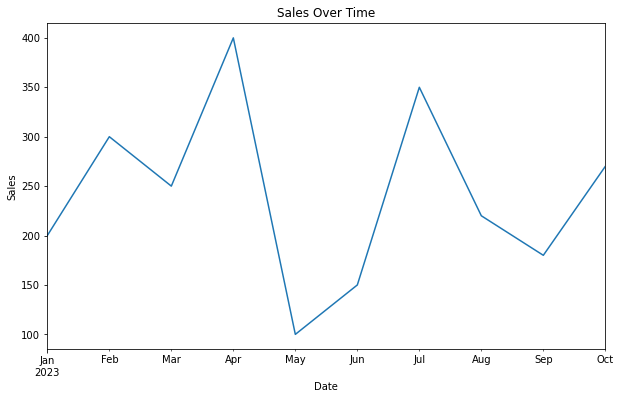

In [26]:
# Step 3: Exploratory Data Analysis
# Plot time series graph for Sales
data.set_index('Date')['Sales'].plot(figsize=(10, 6), title='Sales Over Time', ylabel='Sales')
plt.show()

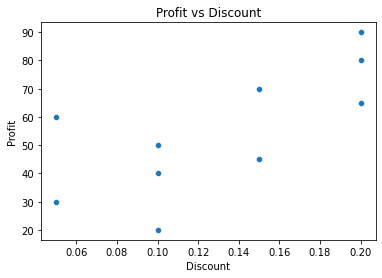

In [27]:
# Scatter plot for Profit vs Discount
sns.scatterplot(data=data, x='Discount', y='Profit')
plt.title('Profit vs Discount')
plt.show()

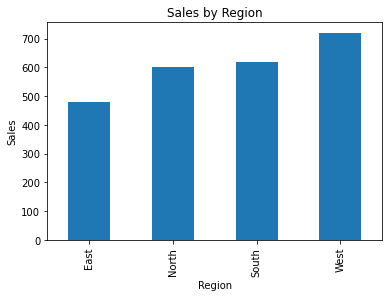

In [28]:
# Sales distribution by Region and Category
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', title='Sales by Region', ylabel='Sales', xlabel='Region')
plt.show()

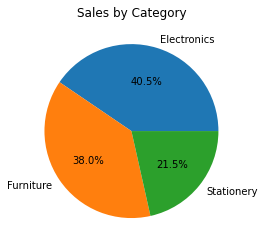

In [29]:
category_sales = data.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', title='Sales by Category', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


In [30]:
# Step 4: Predictive Modeling
# Select features and target
features = data[['Profit', 'Discount']]
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [31]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

Mean Squared Error: 510.0227357072219
R-squared Value: 0.858327017859105


In [34]:
# Display coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [  3.62816588 134.03840802]
Model Intercept: 28.463679376565494
